In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [3]:
pokemon = pd.read_csv('Data/ML_PokeData.csv')
combats = pd.read_csv('Data/combats.csv')

In [4]:
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,Ability__Intimidate,Ability__Keen Eye,Ability__Levitate,Ability__Other,Ability__Overgrow,Ability__Pressure,Ability__Sturdy,Ability__Swarm,Ability__Swift Swim,Ability__Torrent
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,1,0,0,0,0,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,1,0,0,0,0,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,1,0,0,0,0,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0


In [5]:
cols = ["First_pokemon","Second_pokemon","Winner"]
new_combat_data=combats[cols].replace(pokemon.name)
new_combat_data.head()

,First_pokemon,Second_pokemon,Winner
0,Beautifly,Nosepass,Nosepass
1,Carbink,Dedenne,Dedenne
2,Sunflora,Flabébé,Flabébé
3,Smoochum,Swirlix,Swirlix
4,Chikorita,Donphan,Chikorita


In [6]:
new_combat_data.Winner.value_counts()

Noctowl      152
Mime Jr.     136
Cyndaquil    136
Mismagius    134
Roselia      133
            ... 
Duosion        5
Smoochum       4
Virizion       4
Ninjask        3
Sunkern        3
Name: Winner, Length: 783, dtype: int64

In [7]:
combats.Winner[combats.Winner == combats.First_pokemon] = 0
combats.Winner[combats.Winner == combats.Second_pokemon] = 1

In [8]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


In [9]:
pokemon.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'defense', 'experience_growth', 'hp',
       'name', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed',
       'generation', 'is_legendary', 'Type1_bug', 'Type1_dark', 'Type1_dragon',
       'Type1_electric', 'Type1_fairy', 'Type1_fighting', 'Type1_fire',
       'Type1_flying', 'Type1_ghost', 'Type1_grass', 'Type1_ground',
       'Type1_ice', 'Type1_normal', 'Type1_poison', 'Type1_psychic',
       'Type1_rock', 'Type1_steel', 'Type1_water', 'Type2_None', 'Type2_bug',
       'Type2_dark', 'Type2_dragon', 'Type2_electric', 'Type2_fairy',
       'Type2_fighting', 'Type2_fire', 'Type

In [10]:
def normalization(data_df):
    stats=['against_bug', 'against_dark', 'against_dragon', 'against_electric','against_fairy', 'against_fight', 'against_fire', 'against_flying','against_ghost', 'against_grass', 'against_ground', 'against_ice','against_normal', 'against_poison', 'against_psychic', 'against_rock','against_steel', 'against_water', 'attack', 'base_egg_steps','base_happiness', 'base_total', 'defense', 'experience_growth', 'hp','pokedex_number', 'sp_attack', 'sp_defense', 'speed','generation', 'is_legendary', 'Type1_bug', 'Type1_dark', 'Type1_dragon','Type1_electric', 'Type1_fairy', 'Type1_fighting', 'Type1_fire','Type1_flying', 'Type1_ghost', 'Type1_grass', 'Type1_ground','Type1_ice', 'Type1_normal', 'Type1_poison', 'Type1_psychic','Type1_rock', 'Type1_steel', 'Type1_water', 'Type2_None', 'Type2_bug','Type2_dark', 'Type2_dragon', 'Type2_electric', 'Type2_fairy','Type2_fighting', 'Type2_fire', 'Type2_flying', 'Type2_ghost','Type2_grass', 'Type2_ground', 'Type2_ice', 'Type2_normal','Type2_poison', 'Type2_psychic','Type2_rock', 'Type2_steel','Type2_water', 'Abilities_Counts', 'Ability__Blaze','Ability__Chlorophyll', 'Ability__Intimidate', 'Ability__Keen Eye','Ability__Levitate', 'Ability__Other', 'Ability__Overgrow','Ability__Pressure', 'Ability__Sturdy', 'Ability__Swarm','Ability__Swift Swim', 'Ability__Torrent']
    stats_df=pokemon[stats].T.to_dict("list")
    one=data_df.First_pokemon.map(stats_df)
    two=data_df.Second_pokemon.map(stats_df)
    temp_list=[]
    for i in range(len(one)):
        temp_list.append(np.array(one[i])-np.array(two[i]))
    new_test = pd.DataFrame(temp_list, columns=stats)
    for c in stats:
        description=new_test[c].describe()
        new_test[c]=(new_test[c]-description['min'])/(description['max']-description['min'])
    return new_test

In [11]:
data=normalization(combats)
data = pd.concat([data,combats.Winner], axis=1)

In [12]:
data.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,Ability__Keen Eye,Ability__Levitate,Ability__Other,Ability__Overgrow,Ability__Pressure,Ability__Sturdy,Ability__Swarm,Ability__Swift Swim,Ability__Torrent,Winner
0,0.433333,0.517241,0.50,0.6250,0.482759,0.28125,0.700000,0.700000,0.500,0.266667,...,0.5,0.5,0.5,0.5,0.5,0.0,1.0,0.5,0.5,1
1,0.500000,0.517241,0.50,0.5625,0.482759,0.56250,0.433333,0.500000,0.500,0.633333,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1
2,0.700000,0.586207,0.75,0.4375,0.482759,0.56250,0.633333,0.633333,0.500,0.433333,...,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.5,1
3,0.700000,0.724138,0.75,0.5000,0.482759,0.56250,0.633333,0.500000,0.625,0.500000,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1
4,0.633333,0.517241,0.50,0.5625,0.482759,0.50000,0.633333,0.633333,0.500,0.300000,...,0.5,0.5,0.5,1.0,0.5,0.0,0.5,0.5,0.5,0


In [13]:
x_label=data.drop("Winner",axis=1)
y_label=data["Winner"]

In [14]:
def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some pretty graphs
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print()
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.25, random_state=42)

TRAINING SET METRICS
[[17660     0]
 [    0 19840]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17660
           1       1.00      1.00      1.00     19840

    accuracy                           1.00     37500
   macro avg       1.00      1.00      1.00     37500
weighted avg       1.00      1.00      1.00     37500


TESTING SET METRICS
[[3602 2339]
 [1672 4887]]
              precision    recall  f1-score   support

           0       0.68      0.61      0.64      5941
           1       0.68      0.75      0.71      6559

    accuracy                           0.68     12500
   macro avg       0.68      0.68      0.68     12500
weighted avg       0.68      0.68      0.68     12500



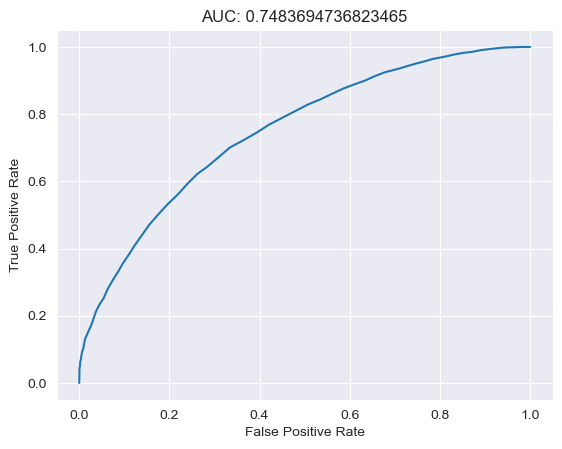

In [34]:
clf = RandomForestClassifier(n_estimators=95)
doMLClassification(clf, x_train, y_train, x_test, y_test)

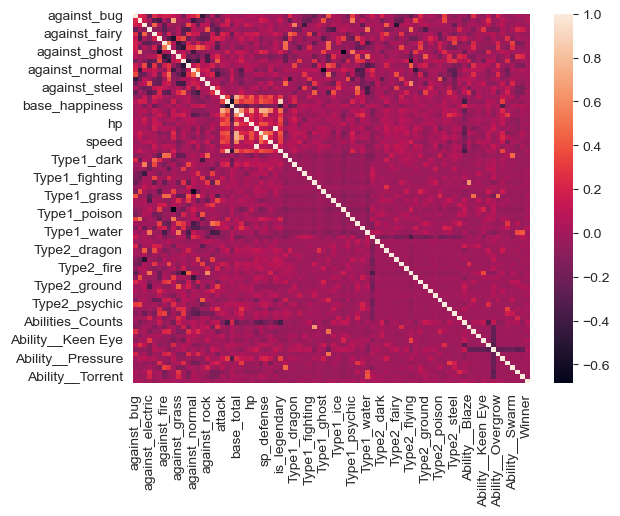

In [17]:
corrs = data.corr()
sns.heatmap(corrs)
plt.show()

In [18]:
abs(corrs["Winner"]).sort_values(ascending=False)

Winner                 1.000000
Type1_steel            0.071220
Abilities_Counts       0.058294
Ability__Intimidate    0.050519
Ability__Torrent       0.049271
                         ...   
Type2_ghost            0.001644
Type2_dark             0.001176
Type2_water            0.000839
Ability__Overgrow      0.000639
Type1_poison           0.000469
Name: Winner, Length: 82, dtype: float64

TRAINING SET METRICS
[[17660     0]
 [    0 19840]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17660
           1       1.00      1.00      1.00     19840

    accuracy                           1.00     37500
   macro avg       1.00      1.00      1.00     37500
weighted avg       1.00      1.00      1.00     37500


TESTING SET METRICS
[[3745 2196]
 [1923 4636]]
              precision    recall  f1-score   support

           0       0.66      0.63      0.65      5941
           1       0.68      0.71      0.69      6559

    accuracy                           0.67     12500
   macro avg       0.67      0.67      0.67     12500
weighted avg       0.67      0.67      0.67     12500



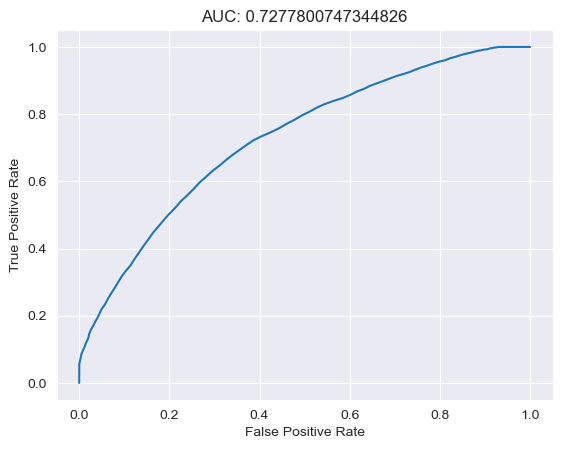

In [19]:
ext = ExtraTreesClassifier(n_estimators=100)
doMLClassification(ext, x_train, y_train, x_test, y_test)

TRAINING SET METRICS
[[12565  5095]
 [ 4236 15604]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     17660
           1       0.75      0.79      0.77     19840

    accuracy                           0.75     37500
   macro avg       0.75      0.75      0.75     37500
weighted avg       0.75      0.75      0.75     37500


TESTING SET METRICS
[[3372 2569]
 [2280 4279]]
              precision    recall  f1-score   support

           0       0.60      0.57      0.58      5941
           1       0.62      0.65      0.64      6559

    accuracy                           0.61     12500
   macro avg       0.61      0.61      0.61     12500
weighted avg       0.61      0.61      0.61     12500



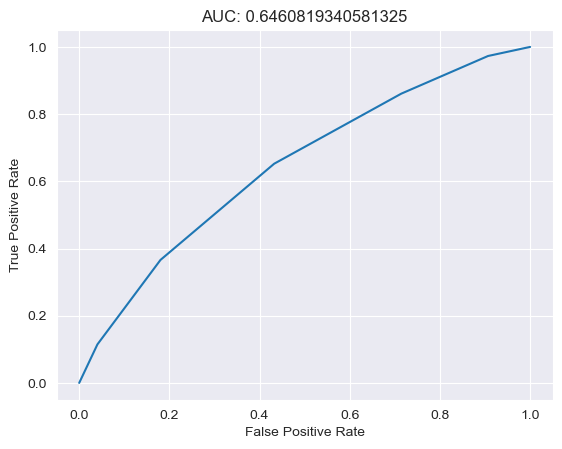

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
doMLClassification(knn, x_train, y_train, x_test, y_test)

TRAINING SET METRICS
[[17660     0]
 [    0 19840]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17660
           1       1.00      1.00      1.00     19840

    accuracy                           1.00     37500
   macro avg       1.00      1.00      1.00     37500
weighted avg       1.00      1.00      1.00     37500


TESTING SET METRICS
[[3464 2477]
 [2552 4007]]
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      5941
           1       0.62      0.61      0.61      6559

    accuracy                           0.60     12500
   macro avg       0.60      0.60      0.60     12500
weighted avg       0.60      0.60      0.60     12500



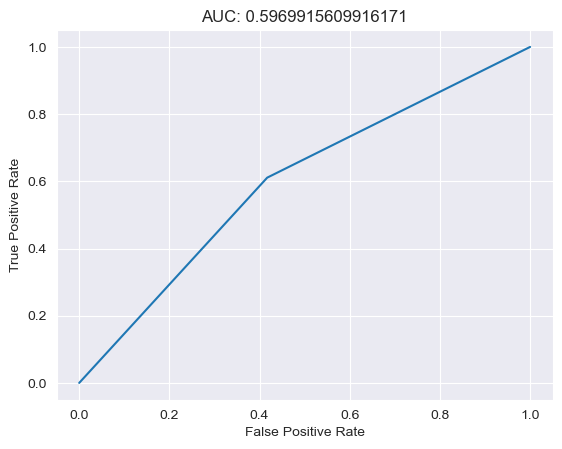

In [21]:
dt = DecisionTreeClassifier(random_state=42)
doMLClassification(dt, x_train, y_train, x_test, y_test)

TRAINING SET METRICS
[[ 8168  9492]
 [ 5736 14104]]
              precision    recall  f1-score   support

           0       0.59      0.46      0.52     17660
           1       0.60      0.71      0.65     19840

    accuracy                           0.59     37500
   macro avg       0.59      0.59      0.58     37500
weighted avg       0.59      0.59      0.59     37500


TESTING SET METRICS
[[2700 3241]
 [1971 4588]]
              precision    recall  f1-score   support

           0       0.58      0.45      0.51      5941
           1       0.59      0.70      0.64      6559

    accuracy                           0.58     12500
   macro avg       0.58      0.58      0.57     12500
weighted avg       0.58      0.58      0.58     12500



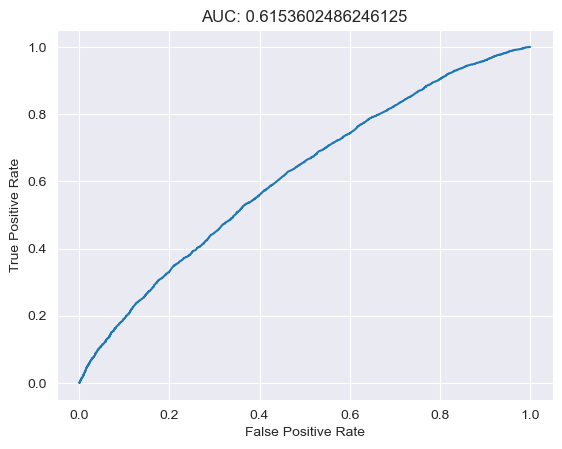

In [23]:
ada = AdaBoostClassifier(random_state=42)
doMLClassification(ada, x_train, y_train, x_test, y_test)

TRAINING SET METRICS
[[17660     0]
 [    0 19840]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17660
           1       1.00      1.00      1.00     19840

    accuracy                           1.00     37500
   macro avg       1.00      1.00      1.00     37500
weighted avg       1.00      1.00      1.00     37500


TESTING SET METRICS
[[3715 2226]
 [1961 4598]]
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      5941
           1       0.67      0.70      0.69      6559

    accuracy                           0.67     12500
   macro avg       0.66      0.66      0.66     12500
weighted avg       0.66      0.67      0.66     12500



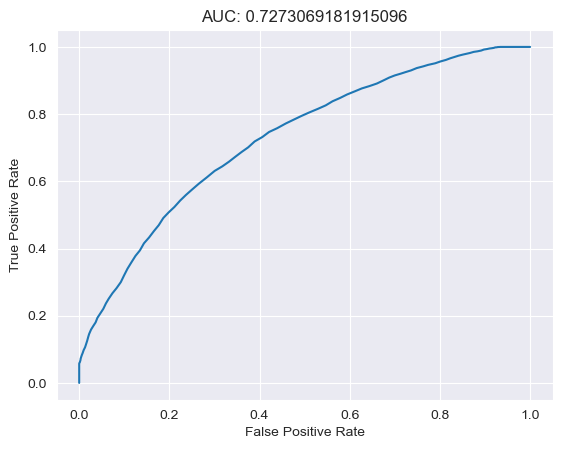

In [25]:
et = ExtraTreesClassifier(random_state=42)
doMLClassification(et, x_train, y_train, x_test, y_test)

TRAINING SET METRICS
[[ 7653 10007]
 [ 3830 16010]]
              precision    recall  f1-score   support

           0       0.67      0.43      0.53     17660
           1       0.62      0.81      0.70     19840

    accuracy                           0.63     37500
   macro avg       0.64      0.62      0.61     37500
weighted avg       0.64      0.63      0.62     37500


TESTING SET METRICS
[[2455 3486]
 [1418 5141]]
              precision    recall  f1-score   support

           0       0.63      0.41      0.50      5941
           1       0.60      0.78      0.68      6559

    accuracy                           0.61     12500
   macro avg       0.61      0.60      0.59     12500
weighted avg       0.61      0.61      0.59     12500



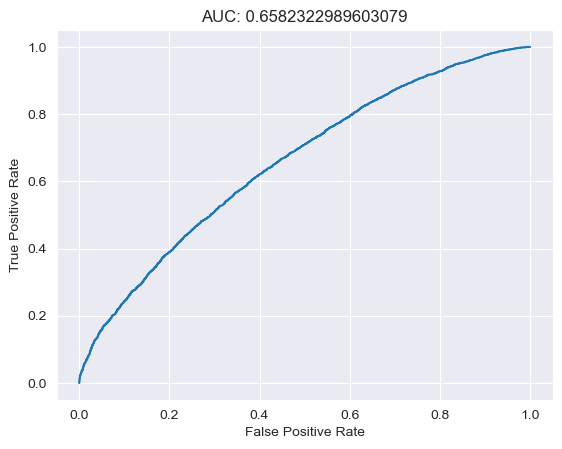

In [26]:
gb = GradientBoostingClassifier(random_state=42)
doMLClassification(gb, x_train, y_train, x_test, y_test)

TRAINING SET METRICS
[[ 9903  7757]
 [ 3947 15893]]
              precision    recall  f1-score   support

           0       0.72      0.56      0.63     17660
           1       0.67      0.80      0.73     19840

    accuracy                           0.69     37500
   macro avg       0.69      0.68      0.68     37500
weighted avg       0.69      0.69      0.68     37500


TESTING SET METRICS
[[2940 3001]
 [1622 4937]]
              precision    recall  f1-score   support

           0       0.64      0.49      0.56      5941
           1       0.62      0.75      0.68      6559

    accuracy                           0.63     12500
   macro avg       0.63      0.62      0.62     12500
weighted avg       0.63      0.63      0.62     12500



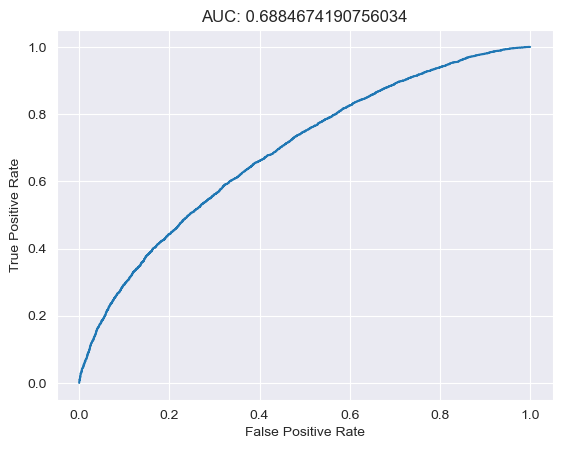

In [27]:
xgb = XGBClassifier(random_state=42, n_estimators=25)
doMLClassification(xgb, x_train, y_train, x_test, y_test)